## Final Project Submission

Please fill out:
* Student name: Hazel Donaldson
* Student pace:  part time
* Scheduled project review date/time: June 17th, 2019
* Instructor name: Victor Geislinger
* Blog post URL:


## King County Housing Data
This dataset contains information about housing in King County from between May 2014 and May 2015. The goal of the this project is to create a house price predictive model using multiple linear regression with avaiable features in the dataset using good data science. I will be attempting to answer some of the following questions with this model: Is it worth investing in King County real estate? What zipcodes have the highest price increase overtime? 

Using the OSEMiN  method, the first step is to obtain the dataset.

# Obtain

The first step is to import the revelant libraries that I will use for this project then load the dataset to get a quick overview of what is inside.

In [60]:
#importing the relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading and obtaining the dataset
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing.shape

(21597, 21)

Using the .shape function, I can see that the dataset has 21597 rows and 21 columns.

# Data Cleaning

The next step is to clean the data. This can mean dropping columns we do not need, dealing with null values, dealing with outliers and fixing datatypes. Looking at the head of the dataset above, I can see that the first thing to do is remove the id and date columns.

In [4]:
#to_drop = list(housing)[0:2]
#housing = housing.drop(to_drop, axis = 1)
cols_to_drop = ['id', 'date']
housing = housing.drop(cols_to_drop, axis = 'columns')
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
housing.info() #checking the data types and number of enteries in the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(1)
memory usage: 3.1+ MB


In [6]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the datatypes and statistics of the data set, I can see some interesting things. For example, I can see that the waterfront, yr_renovated and view columns are missing some enteries. The maximum value of the bedrooms seems a bit high. For some reason the sqrt_basement column is a object datatype when the other sqft columns are integers. It's possible some of the data are strings instead of integers. I will investigate this column more closely next.

In [7]:
housing.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [7]:
housing.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
2600.0        1
602.0         1
1913.0        1
1798.0        1
176.0         1
2120.0        1
2250.0        1
946.0         1
518.0         1
1245.0        1
2240.0        1
415.0         1
1548.0        1
2180.0        1
243.0         1
516.0         1
274.0         1
1852.0        1
2050.0        1
266.0         1
1275.0        1
862.0         1
248.0         1
2400.0        1
2610.0        1
1990.0        1
295.0         1
3000.0        1
935.0         1
2300.0        1
Name: sqft_basement, Len

Initially, I thought that the '?' value was a mistake but it looks as if there are 454 values that equal the question mark. So it seems to be a placeholder when the actual value was unknown. I think it would be best to remove the placeholder.

In [8]:
drop = list(housing)[11]
housing = housing.drop(drop, axis = 'columns')
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#rel_prob = [.59, .01, .0096]
#prob = [i/sum(rel_prob) for i in rel_prob]
#def impute_sqft_basement(value):
    #if value == '?':
#        return np.random.choice(['500.0','600.0','700.0'], p=prob)
#    else:
#        return value
#housing.sqft_basement = housing.sqft_basement.map(lambda x: impute_sqft_basement(x))
#housing.sqft_basement.value_counts(normalize=True)

In [ ]:
#housing['sqft_basement'] = housing['sqft_basement'].astype('float') changing sq_ft basement's datatype to a float

Now that I have removed some of the columns we don't need. I will check into the null values in the dataset using the .isna().sum() function.

In [9]:
housing.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

This confirms that that waterfront, view and yr_renovated columns do have null values and will need to cleaned further. I will start with looking into the waterfront column.

In [10]:
housing.waterfront.unique() #checking the unique values in the waterfront column

array([nan,  0.,  1.])

In [11]:
housing.waterfront.value_counts() #looking at the how many value counts there are

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The .value_counts() and the .unique() functions show me that there are only ones and zeros, which refer to whether a house has waterfront views (1) or a house doesn't have a waterfront view (0).My plan is to separate the dataframe into whether there is or isn't a waterfront view. This way, the null values are taken out of the column.

In [12]:
waterfront_housing = housing.loc[housing.waterfront == 1]
no_waterfront_housing = housing.loc[housing.waterfront == 0]

In [13]:
#joining the houses with waterfront views with the houses that do not have waterfront views
housing = pd.concat([waterfront_housing, no_waterfront_housing])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,0.0,98070,47.4041,-122.451,2680,72513
230,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,1915,1978.0,98166,47.4497,-122.375,2030,13193
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,0.0,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,0.0,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,0.0,98074,47.6053,-122.077,4550,19508


In [14]:
housing.isna().sum() #checking the number of enteries for the waterfront column

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Getting a closer look at the 5 point statistics in the .describe(), there are some interesting things going on. First there seems to be incorrect entry with the max value of 33 bedrooms in the bedrooms columns. It looks like the waterfront column is categorical or boolean because the values range from 0 to 1. The view column seems to go from 0 to 4 when the data dictionary says the values refers to if the house has been viewed. The yr_renovated column needs a lot of work. Now, I will tackle the waterfront column.

Now that the waterfront column has been dealt with. It's time to work on the yr_renovated column.

In [ ]:
#housing.yr_renovated.unique()

In [15]:
to_drop =['yr_renovated']
housing = housing.drop(to_drop, axis = "columns")
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
49,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,2165,1953,98070,47.4041,-122.451,2680,72513
230,655000.0,2,1.75,1450,15798,2.0,1.0,4.0,3,7,1230,1915,98166,47.4497,-122.375,2030,13193
246,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,1830,2000,98074,47.6338,-122.072,3120,18841
264,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,1936,98070,47.4683,-122.438,1230,14267
300,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2600,2002,98074,47.6053,-122.077,4550,19508


For the yr_renovated column, I will do what I did for the waterfront column. Separate the dataframe between whether a house has been renovated or not.

In [ ]:
#no_renovation= housing.loc[housing.yr_renovated == 0] 
#renovation = housing.loc[housing.yr_renovated > 0]

In [ ]:
#housing = pd.concat([no_renovation, renovation])
#housing.head()

In [16]:
housing.isna().sum() #checking for null values in the yr_renovated column

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             57
condition         0
grade             0
sqft_above        0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Now I can move onto the view column.

In [17]:
housing.view.unique() #checking the unique values in the view column

array([ 2.,  4.,  3., nan,  1.,  0.])

In [18]:
no_view = housing.loc[housing.view == 0 ]
view = housing.loc[housing.view > 0]

housing = pd.concat([no_view, view])
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,47.6561,-122.005,4760,101930


Now, I will investigate the bedroom columns to see if the max value is possible.

In [19]:
housing = housing[housing.bedrooms != 33]
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.916300e+04,19163.000000,19163.000000,19163.000000,1.916300e+04,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000
mean,5.414438e+05,3.372906,2.117048,2082.062412,1.506221e+04,1.495199,0.007567,0.231070,3.409905,7.660752,1791.464645,1971.040808,98077.725147,47.560011,-122.214005,1987.256171,12798.076449
std,3.709099e+05,0.903703,0.769256,921.936240,4.077316e+04,0.540310,0.086659,0.763386,0.650371,1.175622,831.780063,29.388273,53.449799,0.138661,0.140729,684.788436,27553.290912
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000
75%,6.439750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2218.500000,1997.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [20]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.916300e+04,19163.000000,19163.000000,19163.000000,1.916300e+04,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000,19163.000000
mean,5.414438e+05,3.372906,2.117048,2082.062412,1.506221e+04,1.495199,0.007567,0.231070,3.409905,7.660752,1791.464645,1971.040808,98077.725147,47.560011,-122.214005,1987.256171,12798.076449
std,3.709099e+05,0.903703,0.769256,921.936240,4.077316e+04,0.540310,0.086659,0.763386,0.650371,1.175622,831.780063,29.388273,53.449799,0.138661,0.140729,684.788436,27553.290912
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000
75%,6.439750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2218.500000,1997.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


It doesn't seem possible to have 33 bedrooms on one floor with one bathroom so, I think the best plan is to delete the row entirely.

In [21]:
housing.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploring Data

Now that the dataset has been clean, I can begin to explore the data more closely. The goal of exploring the dataset is to gain a better understanding of which of the features will help make the best model with the target variable. This step is done with the help of visualizations in order to interpret what the distributions look like and whether the features have a linear relationship with the target. Then I will check if the features have any correlation with each other. Finally, there should be a set of features to model against the target variable, price. I will start by looking at the distributions using the .hist() function.

## Histograms

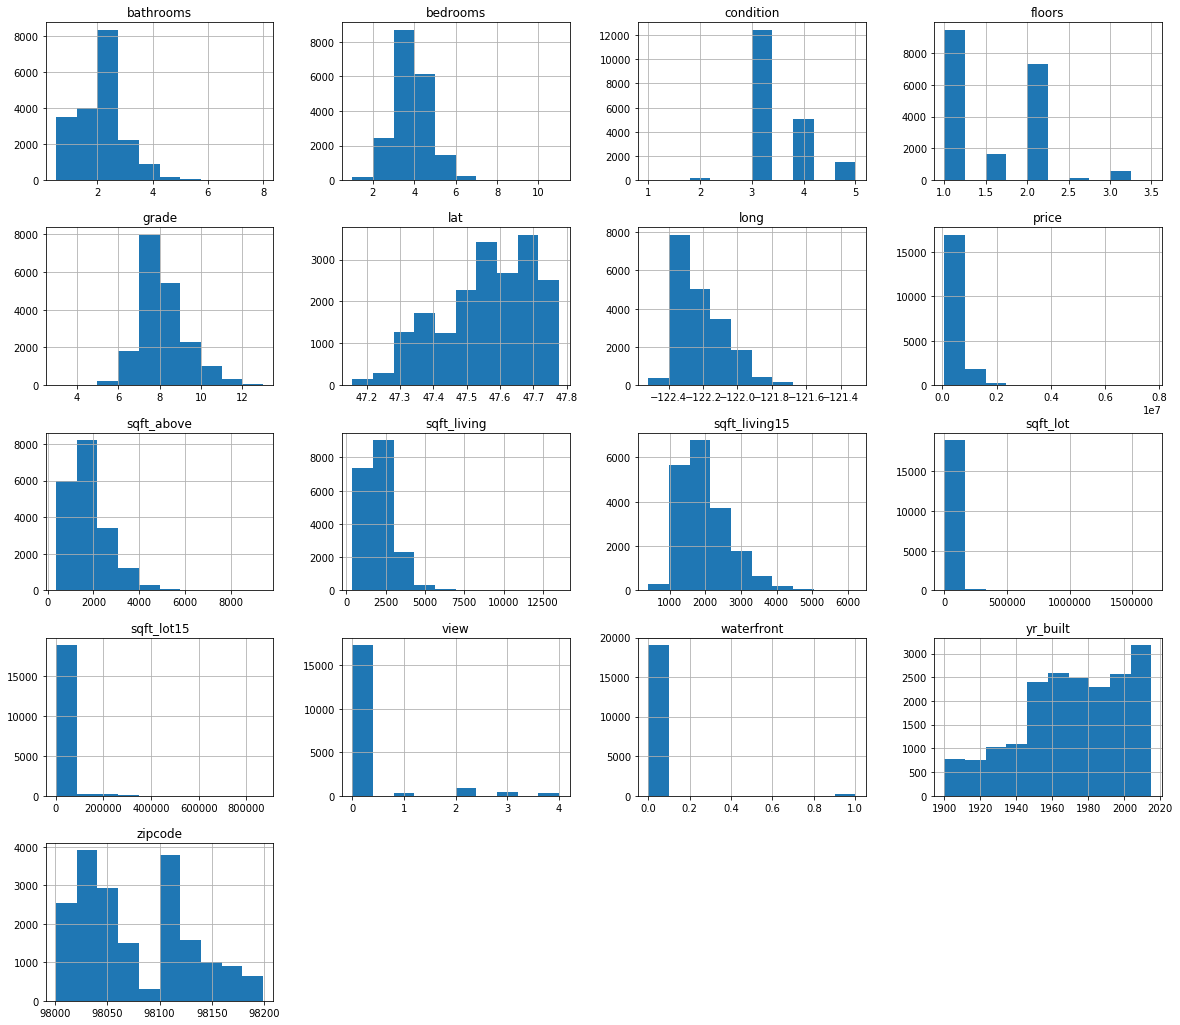

In [22]:
housing.hist(figsize = (20, 18));

Looking at these histograms, most of the data is a bit skewed. The sqft columns have long tails which may mean that those columns will need to be feature scaling. The view, waterfront and yr_renovated columns look like they are categorical. The grade and bedrooms columns look like their distribution is somewhat normal. The next step is to create some scatter plots of the feature variables against the target variable, price.

## Dist Plots

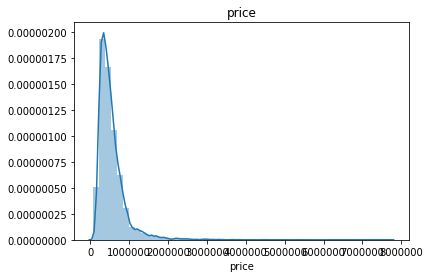

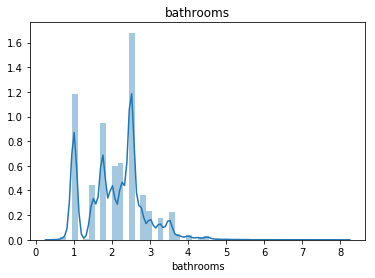

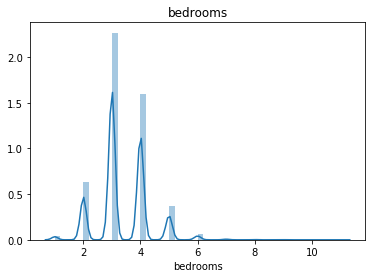

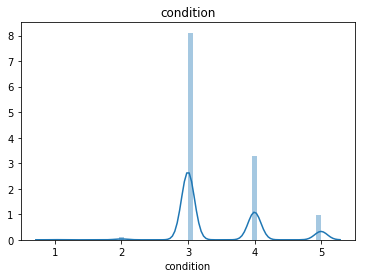

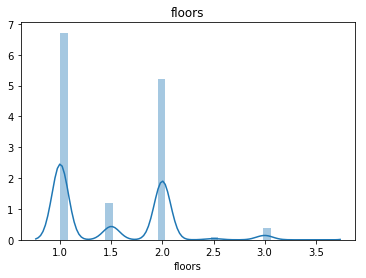

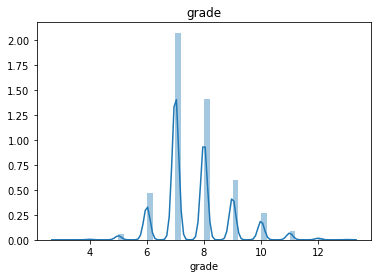

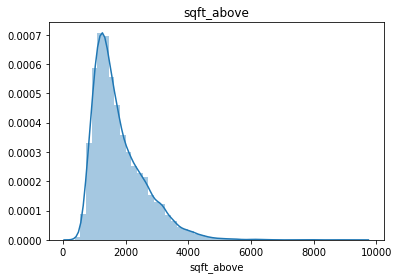

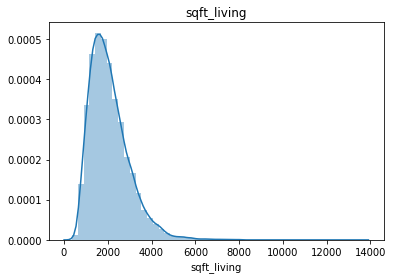

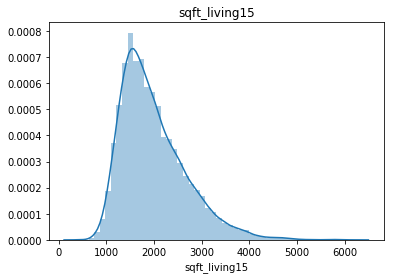

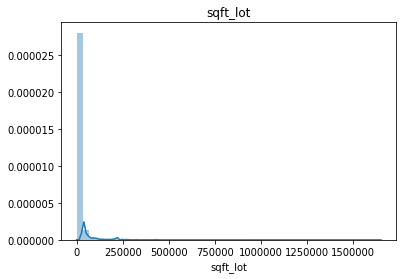

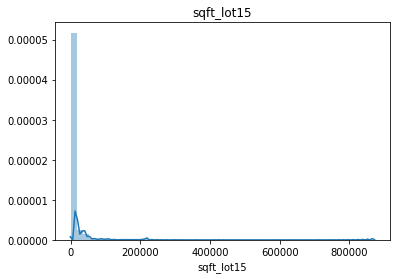

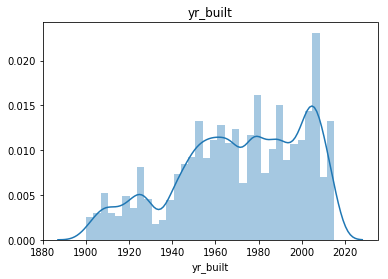

In [23]:
column_list = ['price', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15','yr_built']
for col in column_list:
    sns.distplot(housing[col])
    plt.title(col)
    plt.show();

Looking at these distribution plots and scatter, I can see several things. Much of the data seems to skewed to model against the target as is. I think it would be best to try transformations and scaling.

## Multicollinearity

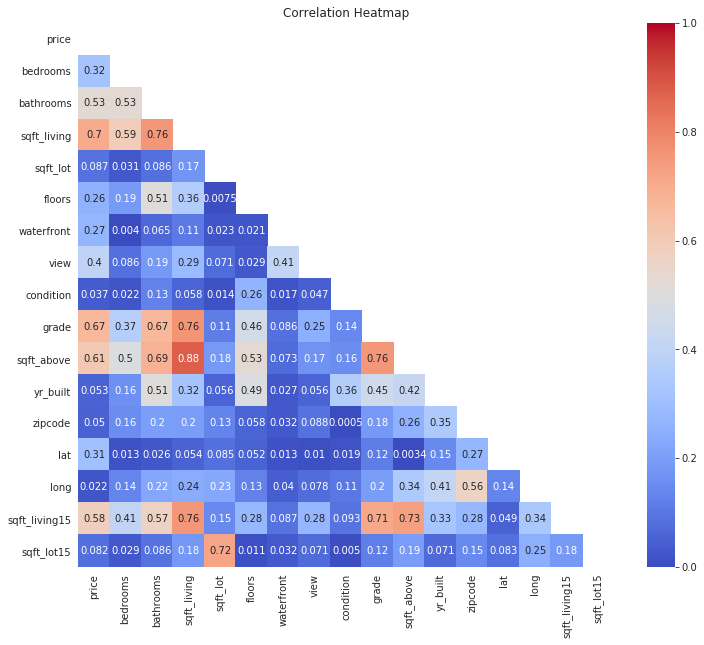

In [24]:
plt.figure(figsize=(12,10))
corr = abs(housing.corr())
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

Remembering that the target variable is price, the variables most highly correlated to the price are: sqft_living, grade, sqft_above. The variables least correlated with price is: sqft_lot15, yr_built, condition. Sqft_living and sqft_above are highly correlated and because sqft_living is more correlated with the price, sqft_above will be dropped.

In [25]:
col_to_drop = ['sqft_above']
housing = housing.drop(col_to_drop, axis = 1)

##  Scaling & Normalizing

In [26]:
housing.skew()

price             4.081052
bedrooms          0.552249
bathrooms         0.524835
sqft_living       1.503625
sqft_lot         13.263266
floors            0.611662
waterfront       11.366023
view              3.438247
condition         1.037048
grade             0.793945
yr_built         -0.473361
zipcode           0.405466
lat              -0.487559
long              0.884149
sqft_living15     1.117606
sqft_lot15        9.762279
dtype: float64

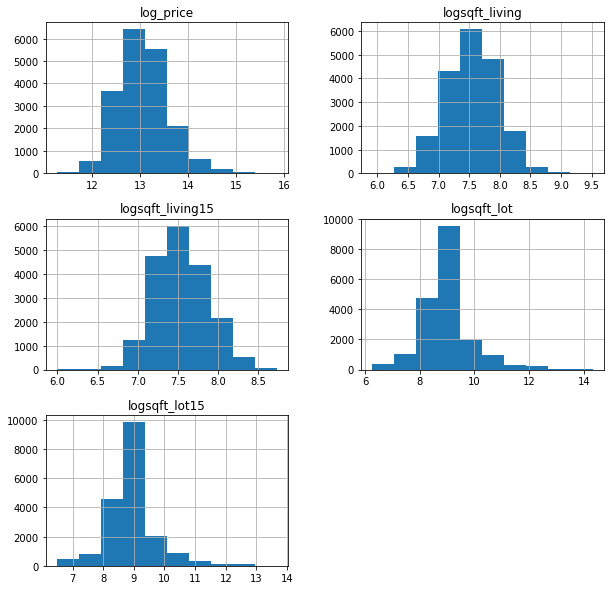

In [27]:
#Log tranformations
housing_log = pd.DataFrame([])
housing_log['logsqft_lot15'] = np.log(housing['sqft_lot15'])
housing_log['logsqft_lot'] = np.log(housing['sqft_lot'])
housing_log['logsqft_living'] = np.log(housing['sqft_living'])
housing_log['logsqft_living15'] = np.log(housing['sqft_living15'])
housing_log['log_price'] = np.log(housing['price'])
housing_log.hist(figsize=(10,10));

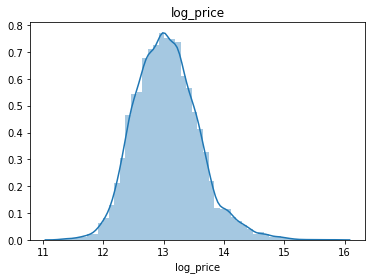

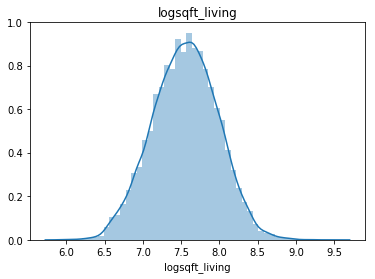

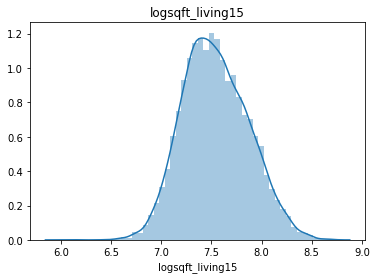

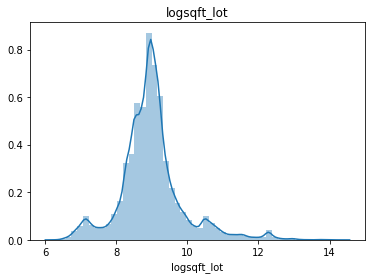

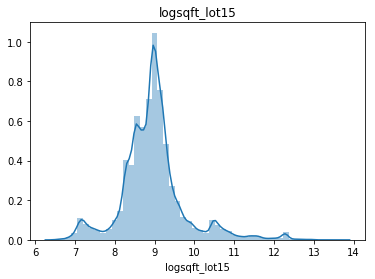

In [28]:
# plots of transformed variables to see if improved by log-transformation.
column_list = ['log_price', 'logsqft_living', 'logsqft_living15', 'logsqft_lot', 'logsqft_lot15']
for col in column_list:
    sns.distplot(housing_log[col])
    plt.title(col)
    plt.show();

## Scatter Plots

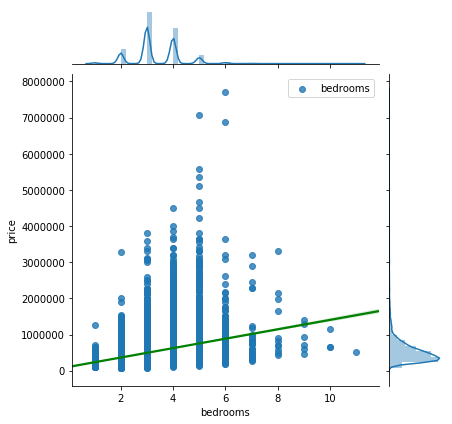

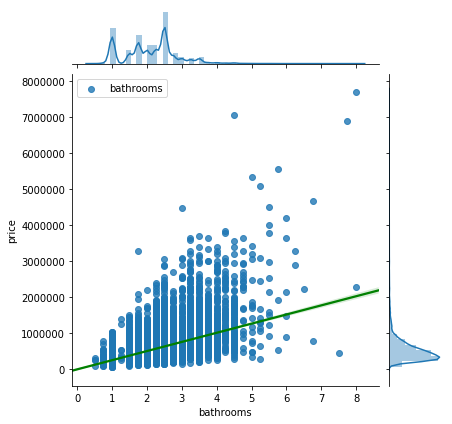

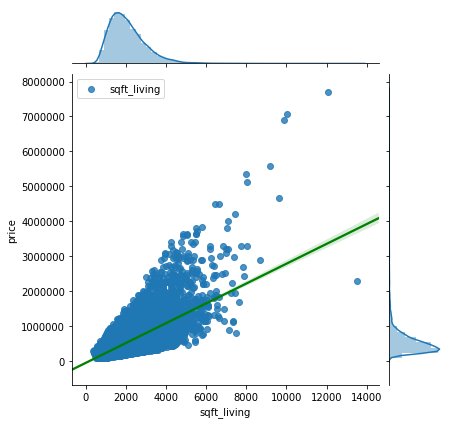

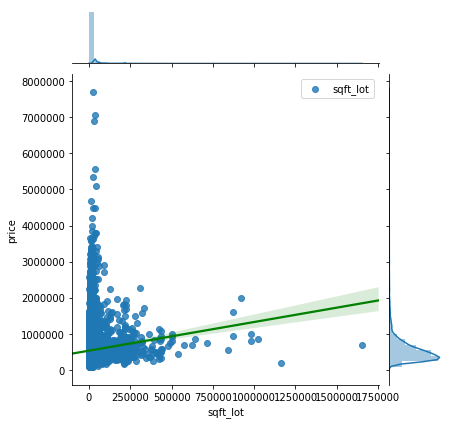

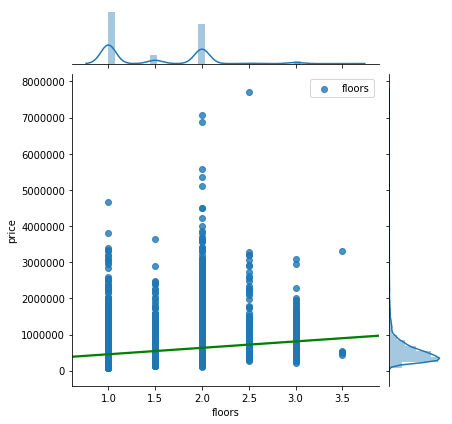

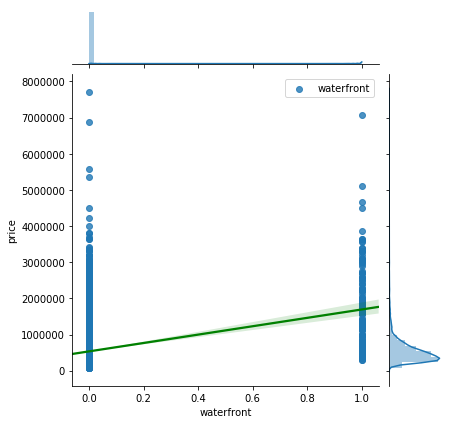

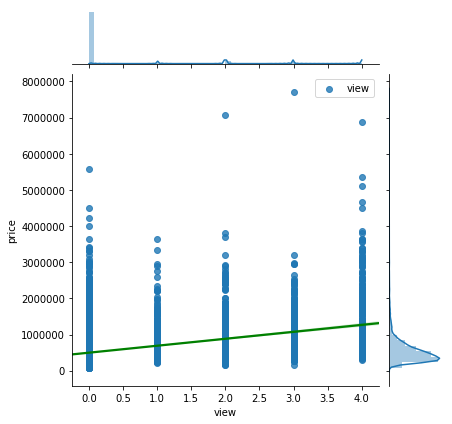

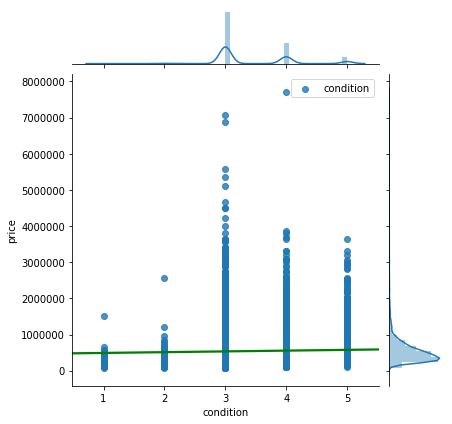

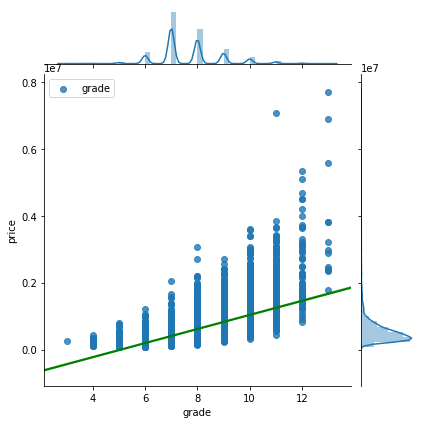

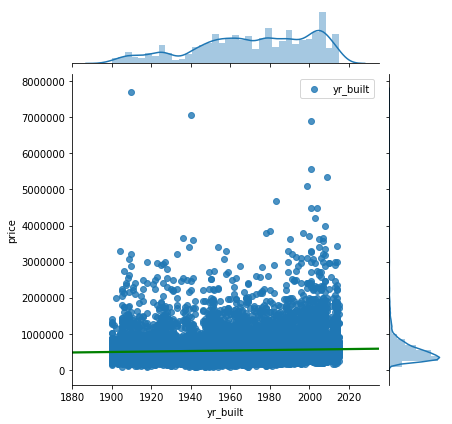

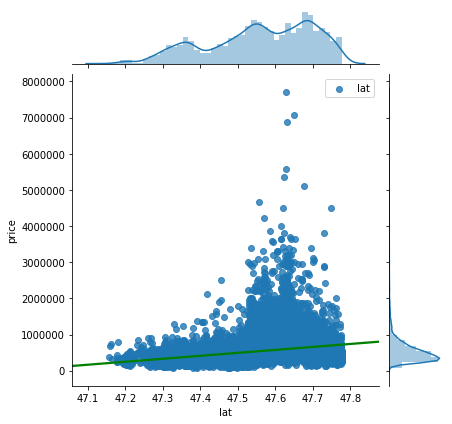

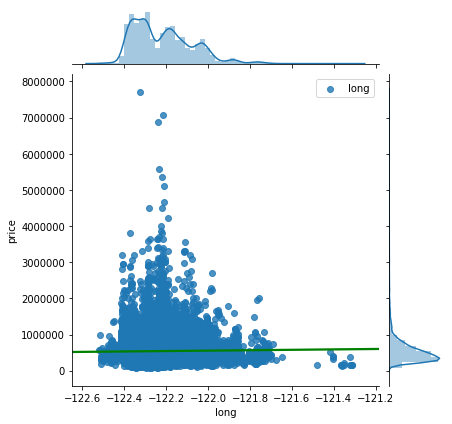

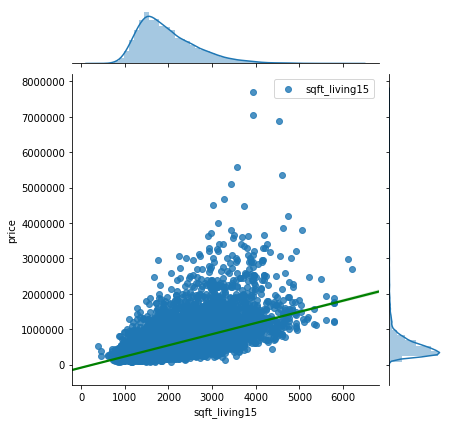

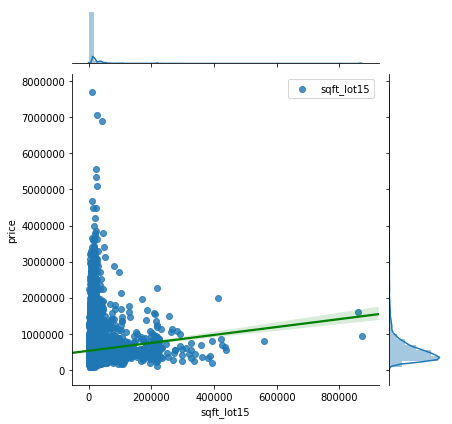

In [55]:
for column in housing.drop(['price', 'zipcode'], axis = 'columns'):
    sns.jointplot(x = column, y= 'price',
                data = housing, kind = 'reg',
                label = column, joint_kws = {'line_kws': {'color': 'green'}})
    plt.legend()
    plt.show()

## One Hot Encoding and Binning

In [29]:
housing.zipcode.nunique()

70

In [30]:
housing.lat.nunique()

4940

In [31]:
housing.long.nunique()

740

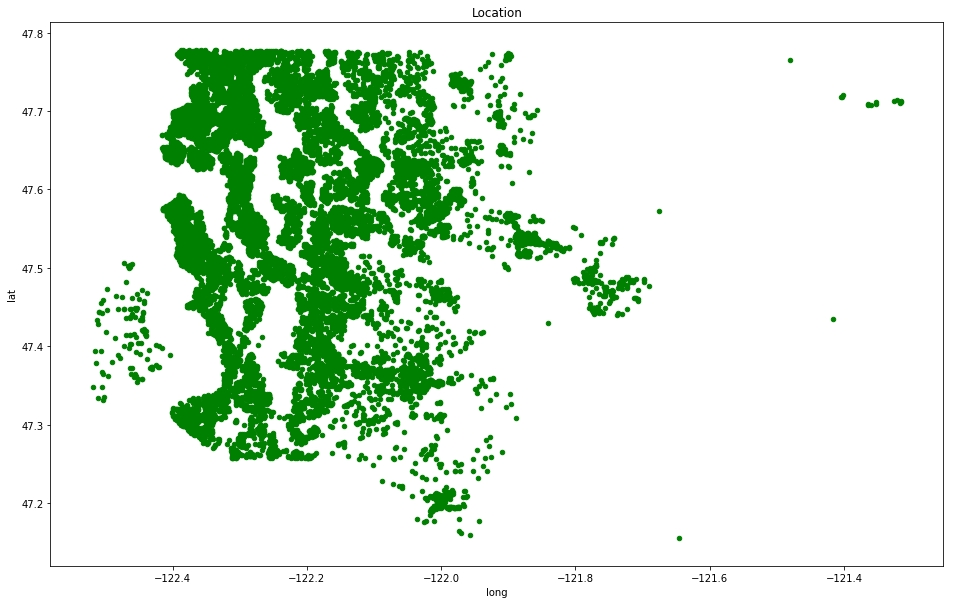

In [34]:
housing.plot(kind = 'scatter', x= 'long', y= 'lat', figsize=(16,10),
            c='g')
plt.title('Location')
plt.show()

In [35]:
housing.zipcode.dtype

dtype('int64')

In [36]:
housing["zipcode"] = housing["zipcode"].astype('str')
zip_dummy = pd.get_dummies(housing.zipcode, prefix = 'ZC')
final_housing = pd.concat([housing, zip_dummy], axis = 1)

In [37]:
final_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19163 entries, 1 to 21577
Data columns (total 86 columns):
price            19163 non-null float64
bedrooms         19163 non-null int64
bathrooms        19163 non-null float64
sqft_living      19163 non-null int64
sqft_lot         19163 non-null int64
floors           19163 non-null float64
waterfront       19163 non-null float64
view             19163 non-null float64
condition        19163 non-null int64
grade            19163 non-null int64
yr_built         19163 non-null int64
zipcode          19163 non-null object
lat              19163 non-null float64
long             19163 non-null float64
sqft_living15    19163 non-null int64
sqft_lot15       19163 non-null int64
ZC_98001         19163 non-null uint8
ZC_98002         19163 non-null uint8
ZC_98003         19163 non-null uint8
ZC_98004         19163 non-null uint8
ZC_98005         19163 non-null uint8
ZC_98006         19163 non-null uint8
ZC_98007         19163 non-null uint8
ZC

In [38]:
final_housing = final_housing.drop('ZC_98199', axis = 1)

# Modeling the Data

In [44]:
lm = linear_model.LinearRegression()

In [40]:
X = final_housing.drop('price', axis =1)
y = final_housing.price

In [45]:
model = lm.fit(X,y)

In [47]:
predictions = lm.predict(X)
print(predictions)

[ 601016.35896526  171337.54290791  533741.93731114 ...  454094.27601454
  892167.94314495 1030030.21740139]


In [48]:
lm.score(X,y)

0.8045108010999447

In [49]:
lm.coef_

array([-3.25019432e+04,  1.95240284e+04,  1.85650774e+02,  2.52523289e-01,
       -1.02841205e+04,  6.78366764e+05,  4.90701384e+04,  2.01219956e+04,
        6.50795729e+04, -1.02118501e+03,  8.22326583e+02,  2.26397397e+05,
       -1.04065662e+05,  1.33141796e+01, -1.31500911e-01, -1.04516103e+05,
       -6.59185351e+04, -1.30380829e+05,  6.06375809e+05,  1.22156877e+05,
        1.01606948e+05,  7.44934092e+04,  8.28730889e+04, -1.77552387e+04,
       -9.20876855e+04, -5.77932102e+04, -9.49145841e+04, -7.08855913e+04,
       -1.70133255e+05,  1.34651223e+04,  3.43517698e+03, -1.12330705e+05,
        4.57766281e+04, -1.29361847e+05, -1.27487995e+05, -1.48020463e+05,
        1.52712568e+05, -2.07017445e+04, -8.62991522e+04,  1.12542821e+06,
        3.00346372e+05, -1.24322853e+05, -2.67583227e+04,  6.53513903e+03,
       -5.18474019e+03, -1.35333872e+05, -9.01011013e+04, -1.43561974e+05,
       -8.66982556e+04, -7.40364548e+04, -2.19172226e+05, -1.04295394e+05,
       -4.33745532e+04, -

In [50]:
lm.intercept_

-102457115.95229627

In [63]:
outcome = 'price'
predictors = final_housing.drop('price', axis =1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

In [64]:
model = ols(formula = formula, data = final_housing).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     946.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:55:07   Log-Likelihood:            -2.5729e+05
No. Observations:               19163   AIC:                         5.148e+05
Df Residuals:                   19079   BIC:                         5.154e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.124e+07   6.48e+06     -3.277      0.001   -3.39e+07   -8.54e+06
zipcode[T.98002] -3.456e+05    8.7e+04     -3.972      0.000   -5.16e+05   -1.75e+05
zipcode[T.98003] -3.774e+05   8.92e+04     -4.232      0.000   -5.52e+05   -2.03e+05
zipcode[T.98004] -8596.7376   9.09e+04     -0.095      0.925   -1.87e+05     1.7e+05
zipcode[T.98005] -2.503e+05   9.02e+04     -2.776      0.006   -4.27e+05   -7.36e+04
zipcode[T.98006] -2.602e+05   8.88e+04     -2.931      0.003   -4.34e+05   -8.62e+04
zipcode[T.98007] -2.733e+05   8.97e+04     -3.048      0.002   -4.49e+05   -9.75e+04
zipcode[T.98008] -2.687e+05    8.9e+04     -3.019      0.003   -4.43e+05   -9.42e+04
zipcode[T.98010] -3.182e+05   8.29e+04     -3.840      0.000   -4.81e+05   -1.56e+05
zipcode[T.98011]  -3.55e+05   9.32e+04     -3.809      0.000   -5.38e+05   -1.72e+05
zipcode[T.98014] -3.366e+05   8.48e+04     -3.968      0.000   -5.03e+05    -1.7e+05
zipcode[T.98019] -3.531e+05    8.8e+04     -4.013      0.000   -5.26e+05   -1.81e+05
zipcode[T.98022] -3.398e+05    8.1e+04     -4.194      0.000   -4.99e+05   -1.81e+05
zipcode[T.98023]  -3.89e+05   9.03e+04     -4.310      0.000   -5.66e+05   -2.12e+05
zipcode[T.98024] -2.968e+05   8.43e+04     -3.522      0.000   -4.62e+05   -1.32e+05
zipcode[T.98027] -3.006e+05    8.6e+04     -3.494      0.000   -4.69e+05   -1.32e+05
zipcode[T.98028] -3.581e+05    9.4e+04     -3.808      0.000   -5.42e+05   -1.74e+05
zipcode[T.98029] -2.786e+05   8.58e+04     -3.246      0.001   -4.47e+05    -1.1e+05
zipcode[T.98030] -3.658e+05   8.72e+04     -4.195      0.000   -5.37e+05   -1.95e+05
zipcode[T.98031] -3.644e+05   8.76e+04     -4.160      0.000   -5.36e+05   -1.93e+05
zipcode[T.98032] -3.743e+05   8.94e+04     -4.189      0.000   -5.49e+05   -1.99e+05
zipcode[T.98033] -2.235e+05   9.15e+04     -2.442      0.015   -4.03e+05   -4.41e+04
zipcode[T.98034] -3.098e+05   9.26e+04     -3.345      0.001   -4.91e+05   -1.28e+05
zipcode[T.98038]  -3.41e+05   8.36e+04     -4.077      0.000   -5.05e+05   -1.77e+05
zipcode[T.98039]  2.653e+05   9.23e+04      2.873      0.004    8.43e+04    4.46e+05
zipcode[T.98040] -1.468e+05   9.05e+04     -1.622      0.105   -3.24e+05    3.06e+04
zipcode[T.98042] -3.583e+05   8.54e+04     -4.195      0.000   -5.26e+05   -1.91e+05
zipcode[T.98045] -3.083e+05   7.94e+04     -3.883      0.000   -4.64e+05   -1.53e+05
zipcode[T.98052] -2.888e+05   9.01e+04     -3.205      0.001   -4.65e+05   -1.12e+05
zipcode[T.98053] -2.942e+05   8.82e+04     -3.336      0.001   -4.67e+05   -1.21e+05
zipcode[T.98055] -3.585e+05   8.86e+04     -4.046      0.000   -5.32e+05   -1.85e+05
zipcode[T.98056] -3.355e+05   8.89e+04     -3.775      0.000    -5.1e+05   -1.61e+05
zipcode[T.98058] -3.614e+05   8.72e+04     -4.146      0.000   -5.32e+05   -1.91e+05
zipcode[T.98059] -3.325